In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

RandomState = 100000

##### ----> Read the file train.csv into Python 

In [2]:
titan = pd.read_csv('./Data/train.csv', sep=',')

In [3]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### DataFrame:

* NaN values: Age, Cabin
* Age check the distribution with a histogram and also the for male and female
* the passanger id and name is related directly to those who survived and not survived could possibly having data leakage
* google to check the method to fill in the NaN values of cabin if not then just **drop**
* fillin the NaN (this is feature engineering) values after splitting the train test dataframe
* drop the feature "Cabin" before splitting data 

##### -----> checking for NaN values in our DF

In [4]:
# it had more than 50% of missing values (613 NaN values)
# also name and keeping passenger id to identify who didnot not survive
titan.drop(columns=['Cabin', 'Name'], inplace=True)

In [5]:
titan[['Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']].isnull().sum()

Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [6]:
#original (891,10)
titan.shape

(891, 10)

In [7]:
titan.dropna(axis=0, subset=['Embarked'], inplace=True)

##### -----> checking the age distribution in order to select the best agg. for the NaN values

* https://statisticsbyjim.com/basics/skewed-distribution/
* the age distribution is skewed to the right
* The mean is greater than the median. The mean overestimates the most common values.
* The median is a more robust statistic in the presence of extreme values.
* calculate the median per sex since there is a difference between the median age of male and female

<AxesSubplot:xlabel='Age', ylabel='Count'>

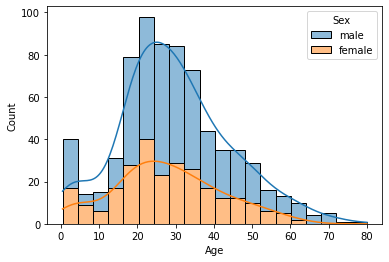

In [8]:
sns.histplot(data=titan, x='Age', hue='Sex', kde=True, multiple="stack")

In [9]:
medi_ageF = titan[(titan['Sex'] == 'female')]['Age'].median()
medi_ageF

27.0

In [10]:
medi_ageM = titan[(titan['Sex'] == 'male')]['Age'].median()
medi_ageM

29.0

##### -----> start splitting the dataframe into features and labels --> train and test

In [11]:
#features
X = titan[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]
#label species
y = titan['Survived']

In [12]:
#check shape
X.shape, y.shape

((889, 9), (889,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RandomState)

In [15]:
X_train.shape, y_train.shape

((533, 9), (533,))

In [16]:
#sns.heatmap(X_train.corr())

##### -----> now start **FEATURE ENGINEERING** with your *X_train*

In [17]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
494,495,3,male,21.00,0,0,A/4 45380,8.0500,S
265,266,2,male,36.00,0,0,C.A. 17248,10.5000,S
78,79,2,male,0.83,0,2,248738,29.0000,S
859,860,3,male,NaN,0,0,2629,7.2292,C
481,482,2,male,NaN,0,0,239854,0.0000,S
...,...,...,...,...,...,...,...,...,...
476,477,2,male,34.00,1,0,31027,21.0000,S
748,749,1,male,19.00,1,0,113773,53.1000,S
443,444,2,female,28.00,0,0,230434,13.0000,S
587,588,1,male,60.00,1,1,13567,79.2000,C


In [18]:
X_train.reset_index(inplace=True)
X_train

,index,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,494,495,3,male,21.00,0,0,A/4 45380,8.0500,S
1,265,266,2,male,36.00,0,0,C.A. 17248,10.5000,S
2,78,79,2,male,0.83,0,2,248738,29.0000,S
3,859,860,3,male,NaN,0,0,2629,7.2292,C
4,481,482,2,male,NaN,0,0,239854,0.0000,S
...,...,...,...,...,...,...,...,...,...,...
528,476,477,2,male,34.00,1,0,31027,21.0000,S
529,748,749,1,male,19.00,1,0,113773,53.1000,S
530,443,444,2,female,28.00,0,0,230434,13.0000,S
531,587,588,1,male,60.00,1,1,13567,79.2000,C


In [19]:
X_train.drop(columns=['index'], inplace=True)
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,495,3,male,21.00,0,0,A/4 45380,8.0500,S
1,266,2,male,36.00,0,0,C.A. 17248,10.5000,S
2,79,2,male,0.83,0,2,248738,29.0000,S
3,860,3,male,NaN,0,0,2629,7.2292,C
4,482,2,male,NaN,0,0,239854,0.0000,S


In [20]:
#X_train.dtypes

In [21]:
#X_train['Age']

##### -----> simple imputer for age

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

In [23]:
# create a simple imputer for missing values of Age
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[['Age']]) # learns from the data set
i = imputer.transform(X_train[['Age']])

In [24]:
age_imputed = pd.DataFrame(i, columns=['Age'])
age_imputed.head()

,Age
0,21.00
1,36.00
2,0.83
3,28.00
4,28.00


In [25]:
# instead of a simple imputer for the age i will create a function to take the median by sex
#def median_age(ages):
    #ages.loc[ages['Sex'] == 'female']['Age'].fillna(medi_ageF)
    #ages.loc[ages['Sex'] == 'male']['Age'].fillna(medi_ageM)

In [28]:
# create oneHotencoder for sex and embarked my categorical data
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohc.fit(X_train[['Sex', 'Embarked']])

onehot = ohc.transform(X_train[['Sex', 'Embarked']])
#onehot = pd.DataFrame(onehot, columns=ohc.get_feature_names())
onehot = pd.DataFrame(onehot)
#onehot.head()
onehot

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
528,0.0,1.0,0.0,0.0,1.0
529,0.0,1.0,0.0,0.0,1.0
530,1.0,0.0,0.0,0.0,1.0
531,0.0,1.0,1.0,0.0,0.0


In [28]:
ohc

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [29]:
kbins = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile')
kbins.fit(X_train[['Fare']])            
t = kbins.transform(X_train[['Fare']])  
t

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [30]:
t.shape

(533, 4)

In [31]:
edges = kbins.bin_edges_[0].round(0)
edges

array([  0.,   8.,  14.,  29., 263.])

In [32]:
labels = []

for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i+1]
    labels.append(f"Fare{edge1}_to_{edge2}")

df_bins = pd.DataFrame(t, columns=labels)
df_bins.head()

,Fare0.0_to_8.0,Fare8.0_to_14.0,Fare14.0_to_29.0,Fare29.0_to_263.0
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [33]:
df_bins.columns

Index(['Fare0.0_to_8.0', 'Fare8.0_to_14.0', 'Fare14.0_to_29.0',
       'Fare29.0_to_263.0'],
      dtype='object')

In [34]:
df_bins[['Fare0.0_to_8.0', 'Fare8.0_to_14.0', 'Fare14.0_to_29.0',
       'Fare29.0_to_263.0']].sum()

Fare0.0_to_8.0       112.0
Fare8.0_to_14.0      154.0
Fare14.0_to_29.0     131.0
Fare29.0_to_263.0    136.0
dtype: float64

In [35]:
df_bins.shape, onehot.shape, age_imputed.shape

((533, 4), (533, 5), (533, 1))

In [36]:
#X_train.reset_index(inplace=True)

In [37]:
# get all those unmodified columns to a seperate DF excluded Ticket because it was not an integer
unmodified = X_train[['PassengerId', 'Pclass',	'SibSp', 'Parch']]
unmodified

,PassengerId,Pclass,SibSp,Parch
0,495,3,0,0
1,266,2,0,0
2,79,2,0,2
3,860,3,0,0
4,482,2,0,0
...,...,...,...,...
528,477,2,1,0
529,749,1,1,0
530,444,2,0,0
531,588,1,1,1


In [38]:
# concat all new df together
X_train_con = pd.concat([onehot, df_bins,age_imputed, unmodified], axis=1)
X_train_con.dtypes

x0_female            float64
x0_male              float64
x1_C                 float64
x1_Q                 float64
x1_S                 float64
Fare0.0_to_8.0       float64
Fare8.0_to_14.0      float64
Fare14.0_to_29.0     float64
Fare29.0_to_263.0    float64
Age                  float64
PassengerId            int64
Pclass                 int64
SibSp                  int64
Parch                  int64
dtype: object

In [39]:
scaler = MinMaxScaler()  # scales every column independently
scaler.fit(X_train_con)
X_train_scal = scaler.transform(X_train_con) # output is a numpy array, not a df
X_train_scal

array([[0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [1.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.125     ,
        0.16666667],
       [0.        , 1.        , 1.        , ..., 0.        , 0.125     ,
        0.16666667]])

In [40]:
pd.DataFrame(X_train_scal).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.279696,0.555806,1.0,0.0,0.000000
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.483555,0.297632,0.5,0.0,0.000000
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.005572,0.086809,0.5,0.0,0.333333
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.374830,0.967306,1.0,0.0,0.000000
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.374830,0.541150,0.5,0.0,0.000000


### -----> **Building MODEL**

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
m = LogisticRegression()
m.fit(X_train_scal, y_train)

LogisticRegression()

In [43]:
titanic1_train_accuracy = m.score(X_train_scal, y_train)
titanic1_train_accuracy

0.8123827392120075

### Now the same for the **TEST data**

* we already did ohc.fit()
* we only need to transform()
* NEVER FIT ANYTHING WITH TEST DATA!!!

In [44]:
test_ohc = ohc.transform(X_test[['Sex', 'Embarked']])
test_bins = kbins.transform(X_test[['Fare']]) #
test_imputer = imputer.transform(X_test[['Age']]) #
test_unmodified = X_test.reset_index()[['PassengerId', 'Pclass', 'SibSp', 'Parch']] #

test_ohc.shape, test_bins.shape, test_imputer.shape, test_unmodified.shape

((356, 5), (356, 4), (356, 1), (356, 4))

In [45]:
test_ohc = pd.DataFrame(test_ohc)
test_bins = pd.DataFrame(test_bins)
test_imputer = pd.DataFrame(test_imputer)

test_ohc.shape, test_bins.shape, test_imputer.shape, test_unmodified.shape

((356, 5), (356, 4), (356, 1), (356, 4))

In [46]:
X_test_conca = pd.concat([test_ohc, test_bins, test_imputer, test_unmodified], axis=1)
X_test_conca.shape

(356, 14)

In [47]:
X_test_scal = scaler.transform(X_test_conca)
X_test_scal.shape

(356, 14)

In [48]:
pd.DataFrame(X_test_scal)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.334058,0.396843,1.0,0.125,0.000000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.402011,0.288613,0.0,0.000,0.000000
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.252514,0.773393,1.0,0.000,0.000000
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.388421,0.638106,1.0,0.000,0.666667
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.252514,0.804961,1.0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.279696,0.552424,1.0,0.000,0.000000
352,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.252514,0.614431,0.5,0.125,0.000000
353,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.565099,0.951522,1.0,0.000,0.000000
354,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.374830,0.263811,1.0,0.000,0.000000


In [49]:
titanic1_train_accuracy

0.8123827392120075

In [50]:
titan_test_accuracy = m.score(X_test_scal, y_test)
titan_test_accuracy

0.7865168539325843

In [51]:
m.coef_

array([[ 1.29147905, -1.29139394, -0.03442487,  0.47467349, -0.44016351,
        -0.13909139,  0.149539  , -0.1750102 ,  0.16464769, -1.71595628,
         0.30205522, -1.81050847, -1.45814364, -0.14464091]])

In [52]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,female,35.0,1,0,113803,53.1000,S
4,5,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,S
887,888,1,female,19.0,0,0,112053,30.0000,S
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,male,26.0,0,0,111369,30.0000,C


In [53]:
predict = m.predict(X_test_scal)
predict

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,